In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pathlib2 import Path

In [3]:
PATH = Path('data/')

# Full data

In [60]:
df = pd.read_csv(PATH/'all_data_overview/naive_DL_traditional_methods.csv')

In [61]:
df.model.unique()

array(['DenseNet121', 'ridge'], dtype=object)

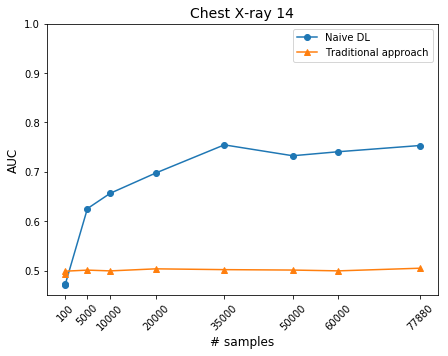

In [64]:
plt.figure(figsize=(7,5))
x = [50, 100, 5_000, 10_000, 20_000, 35_000, 50_000, 60_000, 77_880]
plt.plot(x, df[df['model']=='DenseNet121']['auc'], '-o', label='Naive DL')
plt.plot(x, df[df['model']=='ridge']['auc'], '-^', label='Traditional approach')
plt.xticks([100, 5_000, 10_000, 20_000, 35_000, 50_000, 60_000, 77_880] ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Chest X-ray 14', fontsize=14)
plt.show()

# Small data: Naive DL vs traditional methods

In [13]:
df = pd.read_csv(PATH/'small-data-naive-approach/naive_DL_vs_traditional_chestxray14.csv')
df2 = pd.read_csv(PATH/'small-data-naive-approach/naive_DL_vs_traditional_pneumonia.csv')

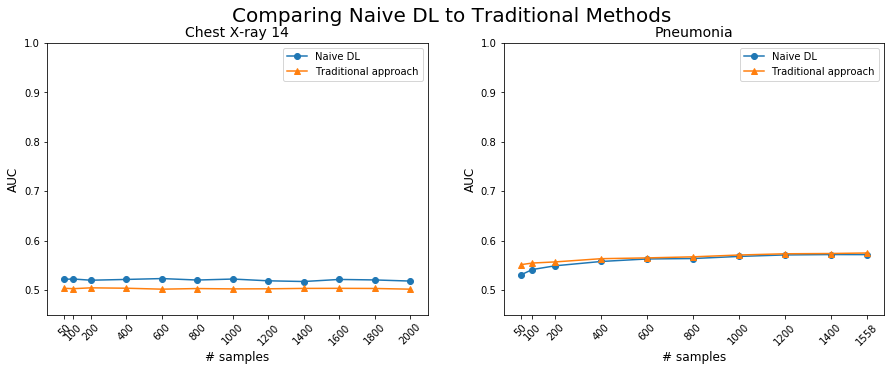

In [24]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparing Naive DL to Traditional Methods', fontsize=20)

plt.subplot(1,2,1)
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]
plt.plot(x, df[df['model']=='Densnet121']['mean'], '-o', label='Naive DL')
plt.plot(x, df[df['model']=='Ridge']['mean'], '-^', label='Traditional approach')
plt.xticks(x ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Chest X-ray 14', fontsize=14)

plt.subplot(1,2,2)
x = [50,100,200,400,600,800,1000,1200,1400,1558]
plt.plot(x, df2[df2['model']=='Densnet121']['mean'], '-o', label='Naive DL')
plt.plot(x, df2[df2['model']=='Ridge']['mean'], '-^', label='Traditional approach')
plt.xticks(x ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Pneumonia', fontsize=14)
plt.show()

# Training techniques

In [15]:
! ls ../training_methods/results/

chestxray14_one_cycle_training.json  pneumonia_one_cycle_training.json
chestxray14_regular_training.json    pneumonia_regular_training.json


In [16]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../training_methods/results/chestxray14_one_cycle_training.json') as jfile:
    chest14_one_cycle = json.load(jfile)
with open('../training_methods/results/chestxray14_regular_training.json') as jfile:
    chest14_regular = json.load(jfile)
    
with open('../training_methods/results/pneumonia_one_cycle_training.json') as jfile:
    pneumonia_one_cycle = json.load(jfile)
with open('../training_methods/results/pneumonia_regular_training.json') as jfile:
    pneumonia_regular = json.load(jfile)

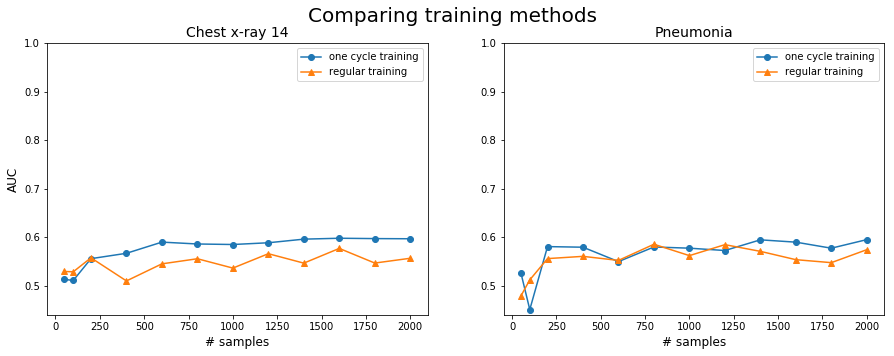

In [17]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparing training methods', fontsize=20)

plt.subplot(1,2,1)
plt.plot(x, chest14_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, chest14_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.44,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(1,2,2)
plt.plot(x, pneumonia_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, pneumonia_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
plt.xlabel('# samples', fontsize=12)
plt.show()

# Transfer learning methods

In [18]:
! ls ../transfer_learning_methods/results/

chestxray14_feature_extractor.json  pneumonia_feature_extractor.json
chestxray14_fine_tune_all.json	    pneumonia_fine_tune_all.json
chestxray14_grad_unfr_diff_lr.json  pneumonia_grad_unfr_diff_lr.json


In [19]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../transfer_learning_methods/results/chestxray14_feature_extractor.json') as jfile:
    chest14_feature_extractor = json.load(jfile)
with open('../transfer_learning_methods/results/chestxray14_fine_tune_all.json') as jfile:
    chest14_fine_tune_all = json.load(jfile)
with open('../transfer_learning_methods/results/chestxray14_grad_unfr_diff_lr.json') as jfile:
    chest14_grad_unfr_diff_lr = json.load(jfile)
    
with open('../transfer_learning_methods/results/pneumonia_feature_extractor.json') as jfile:
    pneumonia_feature_extractor = json.load(jfile)
with open('../transfer_learning_methods/results/pneumonia_fine_tune_all.json') as jfile:
    pneumonia_fine_tune_all = json.load(jfile)
with open('../transfer_learning_methods/results/pneumonia_grad_unfr_diff_lr.json') as jfile:
    pneumonia_grad_unfr_diff_lr = json.load(jfile)

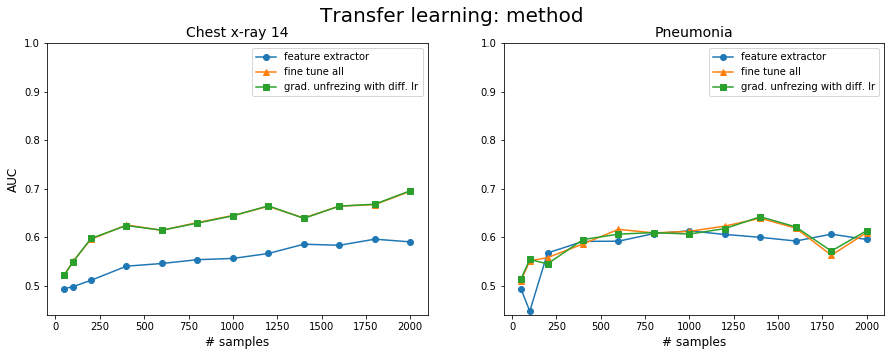

In [20]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Transfer learning: method', fontsize=20)

plt.subplot(1,2,1)
plt.plot(x, chest14_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, chest14_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, chest14_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with diff. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(1,2,2)
plt.plot(x, pneumonia_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, pneumonia_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, pneumonia_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with diff. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
plt.xlabel('# samples', fontsize=12)

plt.show()

# Transfer learning datasets

In [21]:
! ls ../transfer_learning_dataset/data_plots

13diseases.json        chexpert.json		no_pretrained.json
13diseases_small.json  chexpert_pneumonia.json	no_pretrained_pneumonia.json
MURA.json	       imagenet.json		no_pretrained_small.json
MURA_pneumonia.json    imagenet_pneumonia.json
MURA_small.json        imagenet_small.json


In [22]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../transfer_learning_dataset/data_plots/13diseases.json') as jfile:
    emphysema_13diseases = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/chexpert.json') as jfile:
    emphysema_chexpert = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/MURA.json') as jfile:
    emphysema_MURA = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/imagenet.json') as jfile:
    emphysema_imagenet = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/no_pretrained.json') as jfile:
    emphysema_no_pretrained = json.load(jfile)

with open('../transfer_learning_dataset/data_plots/chexpert_pneumonia.json') as jfile:
    pneumonia_chexpert = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/MURA_pneumonia.json') as jfile:
    pneumonia_MURA = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/imagenet_pneumonia.json') as jfile:
    pneumonia_imagenet = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/no_pretrained_pneumonia.json') as jfile:
    pneumonia_no_pretrained = json.load(jfile)

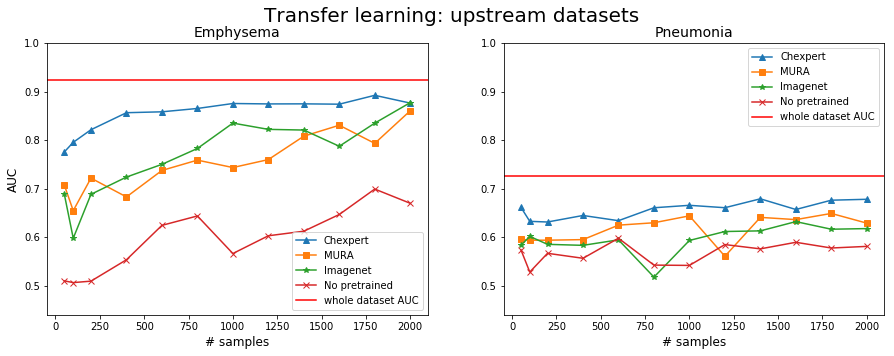

In [23]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Transfer learning: upstream datasets', fontsize=20)

plt.subplot(1,2,1)
# plt.plot(x, emphysema_13diseases['auc'], '-o', label='13 diseases')
plt.plot(x, emphysema_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, emphysema_MURA['auc'], '-s', label='MURA')
plt.plot(x, emphysema_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, emphysema_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.923, color='red', label='whole dataset AUC')
plt.legend()
plt.ylim(.44,1)
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(1,2,2)
plt.plot(x, pneumonia_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, pneumonia_MURA['auc'], '-s', label='MURA')
plt.plot(x, pneumonia_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, pneumonia_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.725, color='red', label='whole dataset AUC')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
plt.xlabel('# samples', fontsize=12)

plt.show()

# Results using the whole chest x ray and the proper training

In [20]:
test_dl = DataBatches(test_df,img_folder_path=img_folder_path,
                  transforms = False, shuffle = False, data=data,
                  batch_size = batch_size, normalize=pretrained)
validate(model, test_dl)

(0.20191780040408833,
 0.8164163548894331,
 [0.7777638937179043,
  0.8882716944725164,
  0.8331421478637311,
  0.6839344107757633,
  0.8366145269199207,
  0.7661666072832656,
  0.7252368098300768,
  0.8640024568362074,
  0.752993899915239,
  0.8507316063175169,
  0.9233914222053733,
  0.8275160380939851,
  0.7879706132917902,
  0.9120928409287741])

In [ ]:
idx2tgt = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
               'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']